# Classical logic gates using quantum gates

## Setup

In [2]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator

simulator = QasmSimulator()

## AND

Input: $q_0$, $q_1$ as qubits
<br>Output: $c_0$ = $q_0$ AND $q_1$

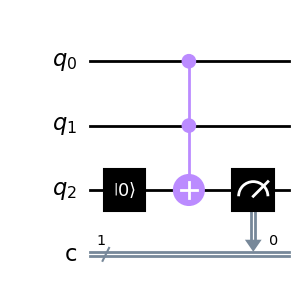

In [3]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
and_c = QuantumCircuit(qreg_q, creg_c)

and_c.reset(qreg_q[2])
and_c.ccx(qreg_q[0],qreg_q[1],qreg_q[2])

and_c.measure(qreg_q[2], creg_c[0])

%matplotlib inline
and_c.draw(output='mpl')

Both $q_0$ and $q_1$ need to be 1 in order to perform a bit flip on $q_2$, which is initialized with |0>. Only in this case, the output will be 1.

## OR

To realize OR, we will make use of the following equation: $$A\lor B = \neg(\neg A \land \neg B)$$
<br>We will first negate both inputs $q_0$ and $q_1$, perform an AND operation and negate the result.

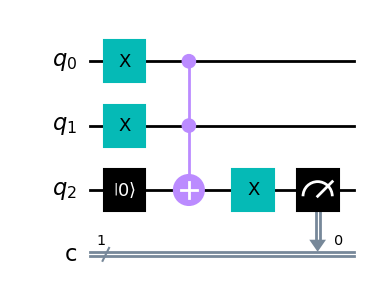

In [4]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
or_c = QuantumCircuit(qreg_q, creg_c)

or_c.reset(qreg_q[2])
or_c.x(qreg_q[0])
or_c.x(qreg_q[1])
or_c.ccx(qreg_q[0],qreg_q[1],qreg_q[2])
or_c.x(qreg_q[2])

or_c.measure(qreg_q[2], creg_c[0])

%matplotlib inline
or_c.draw(output='mpl')

## NAND

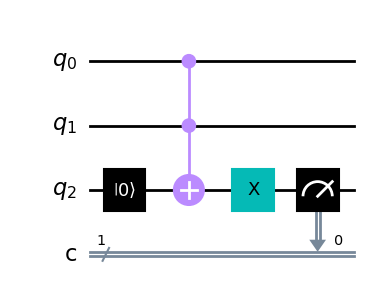

In [5]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
nand_c = QuantumCircuit(qreg_q, creg_c)

nand_c.reset(qreg_q[2])
nand_c.ccx(qreg_q[0],qreg_q[1],qreg_q[2])
nand_c.x(qreg_q[2])

nand_c.measure(qreg_q[2], creg_c[0])

%matplotlib inline
nand_c.draw(output='mpl')

## NOR

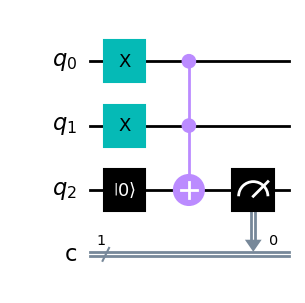

In [6]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
nor_c = QuantumCircuit(qreg_q, creg_c)

nor_c.reset(qreg_q[2])
nor_c.x(qreg_q[0])
nor_c.x(qreg_q[1])
nor_c.ccx(qreg_q[0],qreg_q[1],qreg_q[2])

nor_c.measure(qreg_q[2], creg_c[0])

%matplotlib inline
nor_c.draw(output='mpl')

# XOR

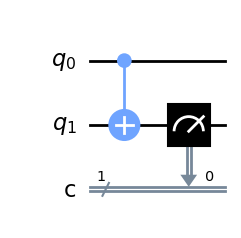

In [7]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
xor_c = QuantumCircuit(qreg_q, creg_c)

xor_c.cx(qreg_q[0],qreg_q[1])

xor_c.measure(qreg_q[1], creg_c[0])

%matplotlib inline
xor_c.draw(output='mpl')

Why does this work? Let's look at the truth table of n XOR gate:<br>

| A | B | A XOR B |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

<br> If A is 0, A XOR B can only be 1 if B is 1, so it suffices to just take B as the output in those cases.
<br> If A is 1 however, B has to be 0 in order for A XOR B to be 1. We can achieve the correct output, by negating B and then taking it as our result.
<br>Those cases can simply be realized with one CNOT gate, as shown above.

# Additional stuff

## OR and Superposition

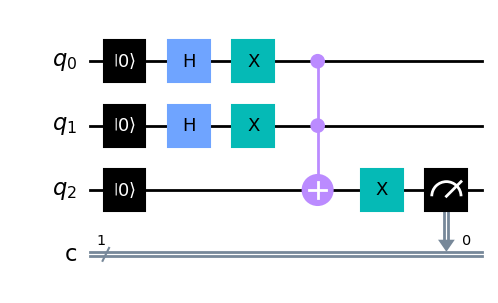

In [8]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
or_c_s = QuantumCircuit(qreg_q, creg_c)

or_c_s.reset(qreg_q[0])
or_c_s.reset(qreg_q[1])
or_c_s.reset(qreg_q[2])

or_c_s.h(qreg_q[0])
or_c_s.h(qreg_q[1])

or_c_s.x(qreg_q[0])
or_c_s.x(qreg_q[1])
or_c_s.ccx(qreg_q[0],qreg_q[1],qreg_q[2])
or_c_s.x(qreg_q[2])

or_c_s.measure(qreg_q[2], creg_c[0])

%matplotlib inline
or_c_s.draw(output='mpl')

In [9]:
result = simulator.run(transpile(or_c_s, simulator), shots=1000).result()
counts = result.get_counts(or_c_s)

print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'0': 258, '1': 742}


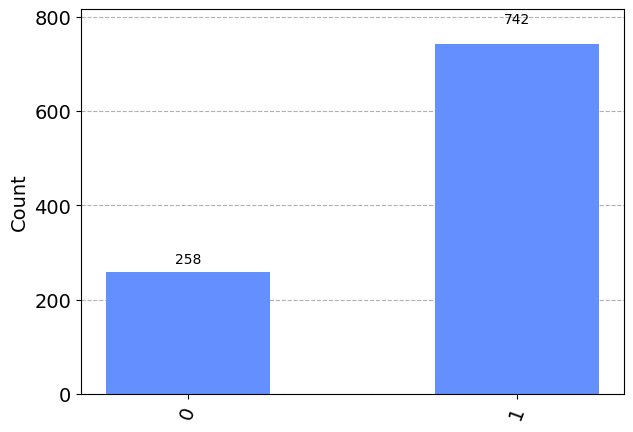

In [10]:
plot_histogram(counts)

Explanation for this result:
<br>Using the Hadamard gate, we set |$q_0$> and |$q_1$> to 
$$\frac{1}{\sqrt{2}} * \begin{bmatrix} 1 & 1\\ 1 & -1 \end{bmatrix} * \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} * \begin{bmatrix} 1 \\ 1 \end{bmatrix} $$
<br>This leaves the combined state of our inputs (using the tensor product) as
$$\frac{1}{2} * \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}$$
<br>meaning that each of the possible inputs 00, 01, 10, 11 has a 25% chance of occuring. In 3 of those 4 cases, the OR gate returns 1, hence the circuit has a 75% chance of returning 1.

# To be continued...